# Polynomial Regression Quick start

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression


## Load the data

In [4]:
url = 'https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/Regression/Datasets/Employee_Salary.csv'
salary_df = pd.read_csv(url)
salary_df.head(3)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549


## Explore the data

In [6]:
salary_df.describe().iloc[:3, :]

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085


In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.3 KB


## Visualize the Data

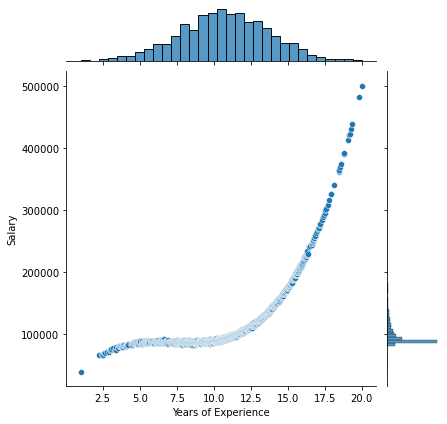

In [9]:
sns.jointplot(x='Years of Experience', y='Salary', data=salary_df);

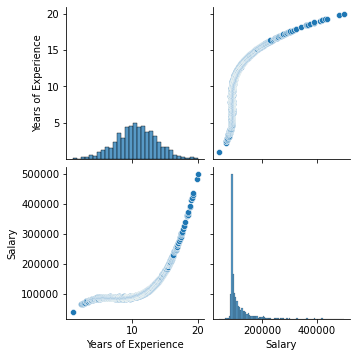

In [12]:
sns.pairplot(salary_df);

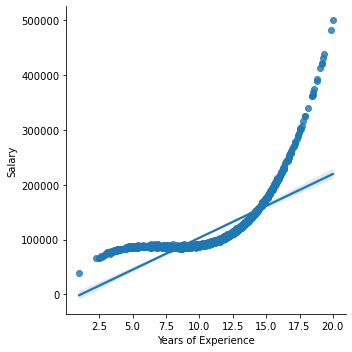

In [10]:
sns.lmplot(x='Years of Experience', y='Salary', data=salary_df);

## Features (X) and target (y)

In [13]:
## features and targets
X = salary_df.loc[:,['Years of Experience']]
y = salary_df['Salary']

print('Shape of Independent variables',X.shape)
print('Shape of dependent variables',y.shape)

## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of Independent variables (2000, 1)
Shape of dependent variables (2000,)
Shape of X_train (1600, 1)
Shape of y_train (1600,)
Shape of X_test (400, 1)
Shape of y_test (400,)


## Model building

* #### Linear model<br>  **dependent-var = y-intercept + slope*independent-var**

Polynomial regression capture the relation between X & Y as nth degree polynomial in X <br>
**y = b0 + b1*x + b2*x^2 + b3*x^3 + ........... + bn*x^n**
> * #### Linear model degree 2
> * #### Linear model degree 3
> * #### Linear model degree 4

In [17]:
# instantiate the model
linear = LinearRegression()
# train the model
linear.fit(X_train, y_train)

linear_preds = linear.predict(X_test)

print('Model coefficient',linear.coef_)
print('Model y-intercept',linear.intercept_)

Model coefficient [11713.90124712]
Model y-intercept -13843.362983505882


In [20]:
# utility for polynomial feature matrix
def poly_feature_matrix(X, deg):
    poly = PolynomialFeatures(degree=deg)
    return poly.fit_transform(X), poly

# utility for polynomial regression
def poly_reg(X_train, y_train, X_test, degree):
    poly_X, poly = poly_feature_matrix(X_train, degree)
    # instantiate the model
    model = LinearRegression()
    # train the model
    model.fit(poly_X, y_train)
    # transform test data
    poly_test = poly.transform(X_test)
    poly_preds = model.predict(poly_test)
    
    print('Model coefficient',model.coef_)
    print('Model y-intercept',model.intercept_)
    
    return poly_preds, model.coef_, model.intercept_


Polynomial Regression Degree 2

In [21]:
deg2_preds, deg2_coef, deg2_intercept = poly_reg(X_train, y_train, X_test, 2)

Model coefficient [     0.         -32653.27391759   2084.28020328]
Model y-intercept 203558.855879009


Polynomial Regression Degree 3

In [22]:
deg3_preds, deg3_coef, deg3_intercept = poly_reg(X_train, y_train, X_test, 3)

Model coefficient [    0.         32267.95507119 -4505.04349301   205.29780651]
Model y-intercept 12089.190586064797


Polynomial Regression Degree 4

In [23]:
deg4_preds, deg4_coef, deg4_intercept = poly_reg(X_train, y_train, X_test, 4)

Model coefficient [ 0.00000000e+00  3.17563689e+04 -4.42101409e+03  1.99707325e+02
  1.29516583e-01]
Model y-intercept 13119.797364147613


## Visulaize model predictions

In [76]:
def plot_predictions(X, y, preds, title='Linear model'):
    plt.scatter(X,y)
    plt.scatter(X, preds, color='red', s=5)
    plt.title(title)


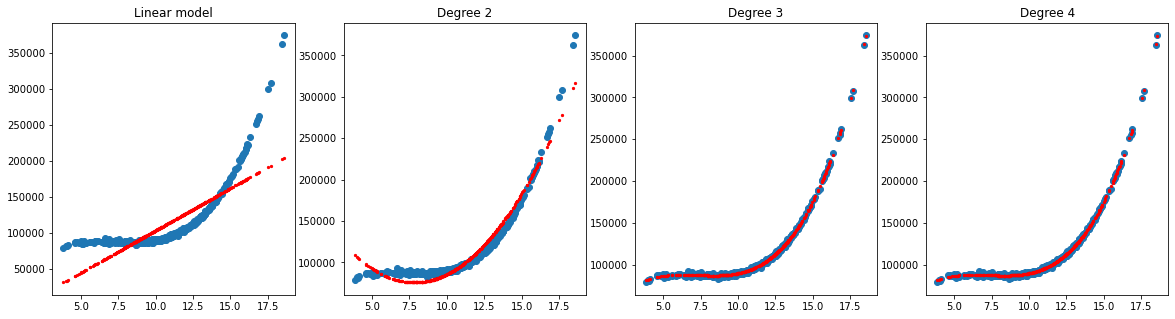

In [77]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plot_predictions(X_test, y_test, linear_preds)
plt.subplot(1,4,2)
plot_predictions(X_test, y_test, deg2_preds, title='Degree 2')
plt.subplot(1,4,3)
plot_predictions(X_test, y_test, deg3_preds, title='Degree 3')
plt.subplot(1,4,4)
plot_predictions(X_test, y_test, deg4_preds, title='Degree 4')